#EMOTION DETECTION


##EMOTION DETECTION

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D

In [2]:
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print(tf.__version__)

2.17.0-dev20240227


EXPLORIG DATASET

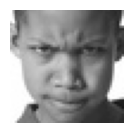

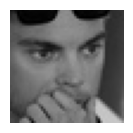

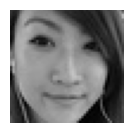

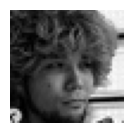

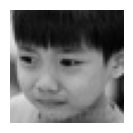

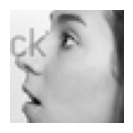

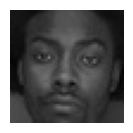

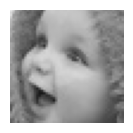

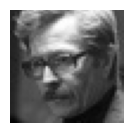

In [10]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(5,5))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [3]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator= datagen_train.flow_from_directory("train/",
                                    target_size=(img_size,img_size),
                                    color_mode="grayscale",
                                    batch_size=batch_size,
                                    class_mode="categorical",
                                    shuffle=True
)

datagen_validation=ImageDataGenerator()
validation_generator= datagen_validation.flow_from_directory("test/",
                                    target_size=(img_size,img_size),
                                    color_mode="grayscale",
                                    batch_size=batch_size,
                                    class_mode="categorical",
                                    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 6198 images belonging to 7 classes.


In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten =Flatten()(conv_3)
    
    dense_1=Dense_f(flatten,256)
    
    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model

In [7]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

In [8]:
epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_accuracy', mode='max', verbose=1)
callbacks = [checkpoint]


# Training the model


In [9]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks

)

Epoch 1/5


C:\Users\Anshu kanukula\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.3202 - loss: 1.8437
Epoch 1: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 404s 886ms/step - accuracy: 0.3203 - loss: 1.8433 - val_accuracy: 0.3333 - val_loss: 1.6895
Epoch 2/5
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:47 1s/step - accuracy: 0.4844 - loss: 1.3165

C:\Users\Anshu kanukula\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4844 - loss: 0.6597 - val_accuracy: 0.2778 - val_loss: 0.8534
Epoch 3/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.4830 - loss: 1.3586
Epoch 3: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 484s 987ms/step - accuracy: 0.4830 - loss: 1.3586 - val_accuracy: 0.3128 - val_loss: 1.7399
Epoch 4/5
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:49 783ms/step - accuracy: 0.4062 - loss: 1.5280
Epoch 4: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4062 - loss: 0.7657 - val_accuracy: 0.3148 - val_loss: 0.8080
Epoch 5/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.5649 - loss: 1.1740
Epoch 5: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 2980s 839ms/step - accuracy: 0.5649 - loss: 1.1741 - val_accuracy: 0.3613 - val_loss: 1.8684


# Model evaluation

In [10]:
model.evaluate(validation_generator)

97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.3622 - loss: 1.9038


[1.8695250749588013, 0.3609228730201721]

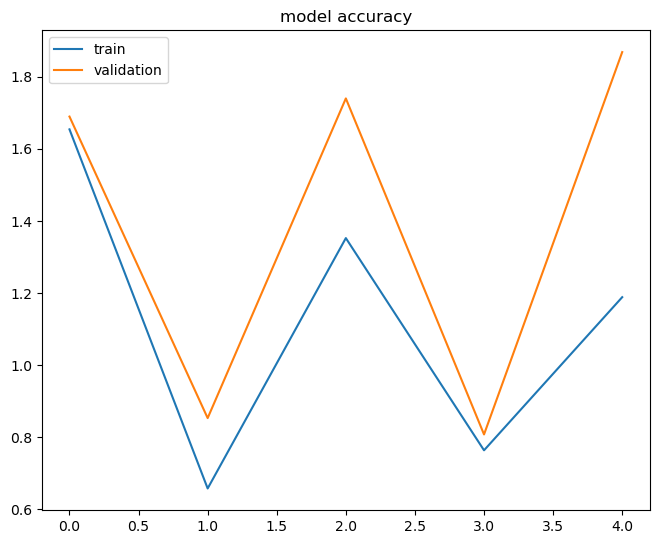

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

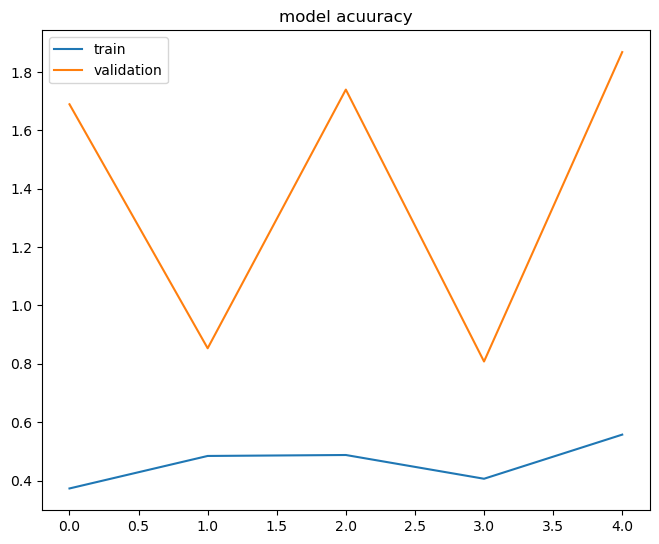

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model acuuracy')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

In [17]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)